# Data Cleaning - Predicting Kickstarter Campaign Success

`Author: John Salisbury / Last Updated: Apr 10, 2023`
***

<a href="https://john-salisbury.github.io/kickstarter-analysis" target="_self" style="font-size: 20px; font-weight: bold; text-decoration:underline">View Data Analysis</a>
   
***

## Summary

In this project, I **clean and analyze data on over 250k Kickstarter crowdfunding campaigns** that took place in the United States between 2009-2018, **using logistic regression** to identify factors that predict campaign success. 

In this particular notebook, I **explore, clean, and prepare the data** for use in a logistic regression model. To view the model and final results from the analysis, visit [this link](https://john-salisbury.github.io/kickstarter-analysis) (or click on "View Data Analysis" above).

--

*Table of Contents:*
<br>
<a href="#import-modules-data" class="toc">Import Modules and Data</a>
<br>
<a href="#data-exploration" class="toc">Data Exploration and Cleaning</a>
<br>
<a href="#examine-data" class="toc nest-one">Examine Data Structure</a>
<br>
<a href="#subset-data" class="toc nest-one">Subset Data</a>
<br>
<a href="#missing-data" class="toc nest-one">Search for Missing/Erroneous Data</a>
<br>
<a href="#add-columns" class="toc nest-one">Create New Columns</a>
<br>
<a href="#drop-columns" class="toc nest-one">Drop Unnecessary Columns</a>
<br>
<a href="#save-csv" class="toc">Save Cleaned CSV for Analysis</a>

--

*Find the data for this project on Kaggle:*
<br>
[Kickstarter Projects](https://www.kaggle.com/datasets/ulrikthygepedersen/kickstarter-projects)
<br><br>
***

<div id="import-modules-data"></div>

## Import Modules and Data

To facilitate the exploration and cleaning of our data, we **import a few common Python modules** (e.g., `pandas`, `matplotlib`, etc.). We also use Pandas to import our data as a dataframe.

In [1]:
#IMPORT MODULES ------

#Common modules
import datetime as dt   #Used to handle date data
import matplotlib.pyplot as plt   #Plotting support
import pandas as pd   #DataFrame support

#Suppress warnings in Jupyter 
import warnings
warnings.filterwarnings('ignore')

#IPython - HTML notebook formatting
from IPython.core.display import HTML

We'll also add some CSS to improve the look and feel of our notebook:

In [2]:
HTML("""
<style>
.jp-needs-light-background {
    display: block;
    margin: auto;
}

.jp-OutputArea-output.jp-RenderedHTMLCommon table {
    margin: 2em auto;
    background: #eae9e9;
    border: 1px solid #000;
    font-size: 14px;
}

.toc {
    font-size: 16px;
}

.nest-one {
    margin-left: 1em;
    font-style: italic;
    font-size: 14px;
}

.nest-two {
    margin-left: 3em;
    font-style: italic;
    font-size: 12px;
}

.faint {
    opacity: 0.2;
}
</style>
""")

And finally, we'll import our raw data as a Pandas dataframe:

In [3]:
#IMPORT DATA ------

#Import CSV as DataFrame
data = pd.read_csv("../data/kickstarter_projects.csv")

<div id="data-exploration"></div>

***
## Data Exploration and Cleaning

<div id="examine-data"></div>

### Examine Data Structure

Now that we've imported our data, we can **start to explore it**. First, we'll use the Pandas `info()` method to examine the following information:
- Column names
- Non-null values in each column
- Data type of each column

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


<br>

From the output above, we can see that we have 11 distinct columns. Using this output, as well as metadata from the data's source on Kaggle, we can describe our columns below:
- `ID` (integer) - a unique numeric ID assigned to each project
- `Name` (string) - Kickstarter campaign name
- `Category` (string) - a primary category that the campaign fits into
- `Subcategory` (string) - a secondary category that the campaign fits into
- `Country` (string) - the country in which the campaign was launched
- `Launched` (string) - the launch date of the campaign
- `Deadline` (string) - the date at which the campaign expires (and fundraising stops)
- `Goal` (integer) - the campaign's fundraising goal in USD
- `Pledged` (integer) - the amount of money (in USD) that the campaign raised during the fundraising period
- `Backers` (integer) - the number of individuals who contributed money to the campaign
- `State` (string) - the final outcome of the campaign (e.g., "Successful", "Failed", etc.)

We also see that all of our columns have the same number of non-null values, indicating that there is no missing data in our dataset. However, we will still need to explore the values within each column to ensure that there are no erroneous and/or duplicate values that could affect our future analysis.

<hr class="faint">

<div id="subset-data"></div>

### Subset Data
#### Filter to US Data
Before we start to explore our data further, we need to **subset it so that it only contains records for Kickstarter campaigns in the United States** (as we are only interested in predicting factors that affect campaign success within the US).

Using the Pandas `value_counts()` method below, we can see that 292,618 (or roughly 78%) of our observations are for campaigns in the US:

In [5]:
print(data["Country"].value_counts())

United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: Country, dtype: int64


We can go ahead and filter our dataframe so that it only includes rows in which the `Country` column contains "United States":

In [6]:
#Subset to US data
us = data[data["Country"] == "United States"]

<hr class="faint">

#### Filter to Binary Outcome
If we look at the values for the `State` variable (which, as a reminder, gives us the final outcome of each campaign) within our subset data, we can see that there are five distinct values:

In [7]:
#What values are present in the "State" column?
us["State"].value_counts()

Failed        152059
Successful    109299
Canceled       28305
Live            1740
Suspended       1215
Name: State, dtype: int64

<br>

Using Kickstarter's [help articles](https://help.kickstarter.com/hc/en-us/articles/115005136354-What-happens-when-a-project-is-suspended-), we can determine that each value represents the following:
- `Failed` - campaign failed to meet its fundraising goal
- `Successful` - campaign met its fundraising goal
- `Canceled` - campaign was canceled by the campaign's primary representative
- `Live` - campaign is still active (as of March 2023)
- `Suspended` - campaign was permanently suspended by Kickstarter for violation of its trust policies

In our future analysis, we are interested in identifying how well various factors in our dataset predict campaign success. We are *not* interested in campaigns that were canceled or suspended, as these outcomes are likely due to other extraneous factors that are not possible to account for in our analysis. Additionally, we are not interested in campaigns that are currently active, as these campaigns don't yet have an outcome.

Thus, we will **further subset our data to remove all observations in which the `State` column contains "Canceled", "Suspended", or "Live"**, leaving us with roughly 89% of our original US data. Our subset data has a binary outcome - either "Failed" or "Successful". 

In [8]:
us_filt = us[us["State"].isin(["Failed", "Successful"])]
us_filt["State"].value_counts()

Failed        152059
Successful    109299
Name: State, dtype: int64

<br>

To facilitate future modeling and analysis, we will go ahead and **convert our values in the `State` column** to `0` (for "Failed") or `1` (for "Successful"). 

In [9]:
#Define a mapping dict
md = {
    'Failed':0,
    'Successful':1
}

#Replace values using map() method
us_filt["State"] = us_filt["State"].map(md)

<hr class="faint">

<div id="missing-data"></div>

### Search for Missing/Erroneous Data
#### Remove Duplicate Values

Now that we've verified that there are no `nan` values within our dataset and have fully subset it to the specific data we're interested in, we can start **searching for duplicate and/or erroneous observations**.

First, let's **see if there are any duplicate values** using Pandas `drop_duplicates()` method:

In [10]:
us_filt = us_filt.drop_duplicates()
us_filt.shape[0]

261358

We see that this operation did not result in any dropped rows, which indicates that there were no duplicates in our US subset. 

<hr class="faint">

#### Search for Erroneous Data
Next, let's investigate values within each of our columns to **check for erroneous data** that could affect our future analysis. We'll go through each column below.

##### Category

In [11]:
#Category variable
us_filt["Category"].value_counts()

Film & Video    46932
Music           40225
Publishing      28677
Art             20448
Games           20229
Design          18485
Technology      18058
Food            18033
Fashion         14536
Theater          8194
Comics           8159
Photography      7229
Crafts           5963
Journalism       3109
Dance            3081
Name: Category, dtype: int64

<br>

It looks like `Category` is a nominal variable with 15 distinct levels. Some levels (e.g. "Film and Video" or "Music") seem to have substantially more observations than other levels (such as "Journalism" or "Dance"), which only contain a few thousand observations. It is questionable if this column will be of much help to our future analysis, so we will probably drop this column in the section below.

<hr class="faint">

##### Subcategory

In [12]:
#Subcategory variable
us_filt["Subcategory"].value_counts()

Product Design     13732
Documentary        12349
Music              10926
Shorts              9534
Tabletop Games      8939
                   ...  
Residencies           43
Letterpress           32
Chiptune              22
Literary Spaces       13
Taxidermy              6
Name: Subcategory, Length: 159, dtype: int64

<br>

It looks `Subcategory` is a nominal variable with 159 distinct values. We can probably drop this column in the section below, as it likely has too many levels to be useful in our future analysis.

<hr class="faint">

##### Country

In [13]:
#Country variable
us_filt["Country"].value_counts()

United States    261358
Name: Country, dtype: int64

<br>

We already subset our data so that it only includes observations for the United States. Thus, the `Country` column should only have one value. Above, we see this is the case.

<hr class="faint">

##### Launch Date

The `Launched` column represents each campaign's initial launch date. Let's see what format each launch date is stored in using the code below:

In [14]:
us_filt["Launched"].head()

0    2009-04-21 21:02:48
1    2009-04-23 00:07:53
2    2009-04-24 21:52:03
3    2009-04-25 17:36:21
4    2009-04-27 14:10:39
Name: Launched, dtype: object

In [15]:
type(us_filt["Launched"][0])

str

We see that the `Launched` column contains strings representing dates in "%Y-%m-%d %H:%M:%S" format. To allow us to calculate a timedelta between each campaign's fundraising deadline and launch date, we should go ahead an convert these strings into datetime objects. We can use Pandas `to_datetime()` to convert each string into a Pandas datetime object:

In [16]:
#Convert column from str aformat into datetime format
us_filt["Launched"] = pd.to_datetime(us_filt["Launched"], format="%Y-%m-%d %H:%M:%S")

Now, let's look at a histogram of dates within the `Launched` column to check for outliers:

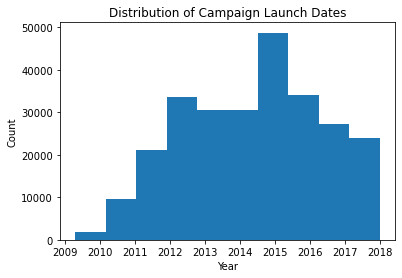

In [17]:
#Plot histogram of launch dates
plt.hist(us_filt["Launched"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Campaign Launch Dates")
plt.show()

It looks like the dates within the `Launched` column seem to follow a normal distribution (maybe a bit left skewed) and fall between 2009-2018. 

In [18]:
min(us_filt["Launched"])

Timestamp('2009-04-21 21:02:48')

Additionally, it looks like our earliest campaign was launched on April 21, 2009, which is right around the time when Kickstarter was [founded](https://www.kickstarter.com/about#:~:text=Since%20our%20launch%2C%20on%20April,projects%20have%20been%20successfully%20funded.). Thus, it doesn't seem like we have any outliers in the `Launched` column, so no additional cleaning is necessary at this time.

<hr class="faint">

##### Deadline
The `Deadline` column represents the date on which each campaign's fundraising period closed (i.e., its fundraising deadline). Let's take the same approach that we used for `Launched` and see what format deadlines are stored in using the code below:

In [19]:
us_filt["Deadline"].head()

0    2009-05-31
1    2009-07-20
2    2009-05-03
3    2009-07-14
4    2009-05-26
Name: Deadline, dtype: object

In [20]:
type(us_filt["Launched"][0])

pandas._libs.tslibs.timestamps.Timestamp

Unlike the `Launched` column, it looks like dates in the `Deadline` column are stored as Pandas timestamp objects in the "%Y-%m-%d" format. For consistency, we will convert these dates into Pandas datetime objects:

In [21]:
#Convert column from str format into datetime format
us_filt["Deadline"] = pd.to_datetime(us_filt["Deadline"], format="%Y-%m-%d")

Let's look at a histogram of dates within the `Deadline` column to check for outliers:

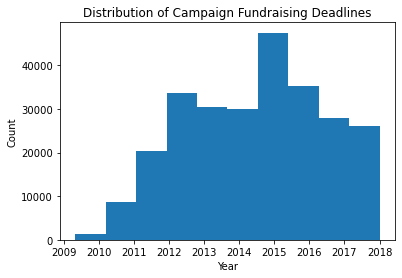

In [22]:
#Plot histogram of launch dates
plt.hist(us_filt["Deadline"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Campaign Fundraising Deadlines")
plt.show()

We see a similar spread to the histogram for values in `Launched`, as well as values between 2009 and 2018. This suggests that there are no outliers in `Deadline` that need to be addressed as of yet.

<hr class="faint">

##### Fundraising Period

Using the code above, we've seen that the values in `Launched` and `Deadline` look OK. However, we need to confirm that each campaign actually has a valid fundraising period - or rather, that each campaign's fundraising deadline takes place *after* its initial campaign launch date.

To check this, we can create a new column in our dataframe (`fund_days`) that contains the timedelta between each campaign's fundraising deadline and launch date converted into days:

In [23]:
#Calculate time delta for each campaign period
fund_period = us_filt["Deadline"] - us_filt["Launched"]

#Convert time deltas to days (float)
us_filt["fund_days"] = fund_period.dt.total_seconds() / 3600 / 24

Let's examine our new `fund_days` column to confirm that the fundraising period for each of our campaigns is valid:

In [24]:
#Return total number of null values, if any
print(str(us_filt["fund_days"].isnull().sum()) + " Null Values")

0 Null Values


In [25]:
#Return summary statistics
us_filt["fund_days"].describe()

count    261358.000000
mean         33.628154
std          13.015217
min           0.005058
25%          29.090854
50%          29.743773
75%          36.353102
max          91.962650
Name: fund_days, dtype: float64

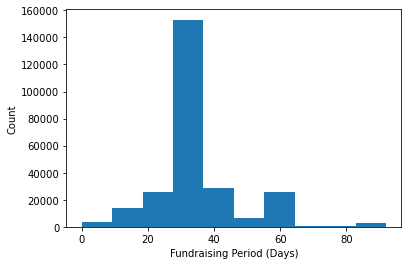

In [26]:
#Plot histogram of fundraising periods 
plt.hist(us_filt["fund_days"])
plt.xlabel('Fundraising Period (Days)')
plt.ylabel('Count')
plt.show()

Above, we see that the fundraising periods for our campaigns are between 0 and 92 days in duration. We do not have any negative or null fundraising periods, which suggests that no additional cleaning is necessary for this column.

<hr class="faint">

##### Fundraising Goal

Let's explore values in the fundraising goal (`Goal`) column below:

In [27]:
#Return summary statistics
us_filt["Goal"].describe()

count    2.613580e+05
mean     3.934893e+04
std      1.035441e+06
min      0.000000e+00
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: Goal, dtype: float64

In [28]:
us_filt["Goal"].median()

5000.0

Based on the information above, we see that a majority (75%) of campaign fundraising goals are below \\$1,500 USD, with an average goal of roughly \\$3,935 USD and a median goal of $5,000 USD. However, we see that the values in this column have a very large range (to the tune of \\$100 million USD!). We also see that our data has a standard deviation of over \\$1 million USD, indicating that there is quite a bit of spread around the mean value.

We can see this in the histogram below:

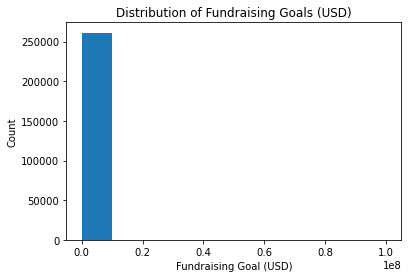

In [29]:
#Goal
plt.hist(us_filt["Goal"])
plt.xlabel('Fundraising Goal (USD)')
plt.ylabel('Count')
plt.title('Distribution of Fundraising Goals (USD)')
plt.show()

Let's try reducing the range of the data we plot in our histogram, excluding campaigns with fundraising goals greater than $100,000 USD:

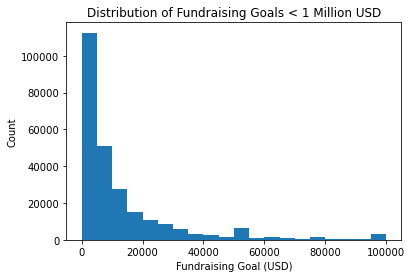

In [30]:
#Goal
plt.hist(us_filt["Goal"][us_filt["Goal"] <= 100000], bins=20)
plt.xlabel('Fundraising Goal (USD)')
plt.ylabel('Count')
plt.title('Distribution of Fundraising Goals < 1 Million USD')
plt.show()

In this histogram above, we can see that this variable is highly right-skewed, with most campaigns having relatively small fundraising goals.

Although we have a very large range for the data in the `Goal` column, it is still valid and will likely help to inform our future analysis. Thus, we won't take additional cleaning steps for `Goal` at this time.

<hr class="faint">

##### Number of Backers
Next, let's explore values in the "number of backers" (`Backers`) column below:

In [31]:
#Return summary statistics
us_filt["Backers"].describe()

count    261358.000000
mean        122.745655
std        1039.320806
min           0.000000
25%           2.000000
50%          17.000000
75%          66.000000
max      219382.000000
Name: Backers, dtype: float64

In [32]:
#Calculate median value
us_filt["Backers"].median()

17.0

We see that a majority (75%) of campaigns have 66 or fewer backers, with a median value of 17 backers. Similar to our `Goal` column, we see that the values in this column have a very large range (with the most popular campaign having over 200,000 backers!).

We can see this in the histogram below:

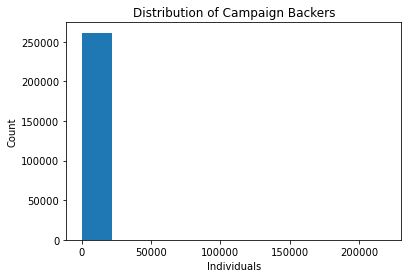

In [33]:
#Generate histogram
plt.hist(us_filt["Backers"])
plt.xlabel('Individuals')
plt.ylabel('Count')
plt.title('Distribution of Campaign Backers')
plt.show()

Again, let's try reducing the range of the data we plot to exclude campaigns with more than 1000 backers:

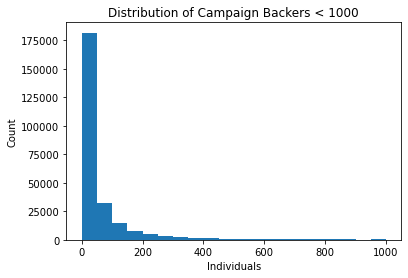

In [34]:
#Generate histogram
plt.hist(us_filt["Backers"][us_filt["Backers"] <= 1000], bins=20)
plt.xlabel('Individuals')
plt.ylabel('Count')
plt.title('Distribution of Campaign Backers < 1000')
plt.show()

Similar to `Goal`, we can see that this variable is highly right-skewed, with most campaigns having relatively few backers.

Again, despite having a very large range in this column, the data within `Backers` is valid and will likely help to inform our future analysis. Thus, we can move forward with our exploration and cleaning.

<hr class="faint">

<div id="add-columns"></div>

### Create New Columns

The next step in our exploration/cleaning process is to **add a few columns that might be useful** for our future analysis.

- Campaign title length
- Time since Kickstarter launch
- Season

#### Campaign Title Length (Chars)
Could the length of each campaign title on Kickstarter affect that campaign's success? Are shorter titles more effective at attracting donors than longer titles? This could be an interesting variable to add to our future analysis.

We can quickly calculate each campaign's title length using Pandas string methods below:

In [35]:
#Create column
us_filt["name_len"] = us_filt["Name"].str.len()

Let's quickly explore the distribution of name length across our campaigns:

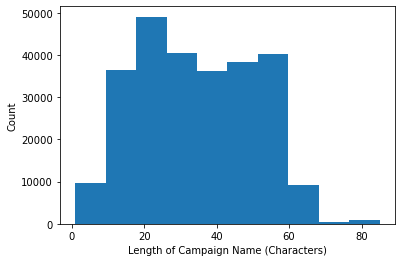

In [36]:
#Explore column
plt.hist(us_filt["name_len"])
plt.xlabel("Length of Campaign Name (Characters)")
plt.ylabel("Count")
plt.show()

Surprisingly, it looks like campaign name length has a relatively normal distribution - interesting!

<hr class="faint">

#### Time Since Kickstarter Launch (Years)
It seems possible that campaigns launched in the early days of Kickstarter may have been either less or more popular than campaigns launched after the platform had been in existence for several years. By including "time since Kickstarter launch" as a variable, we can potentially account for this in our analysis. We use the code below to save this variable in the `years_since` column:

In [37]:
#Create launch year column
us_filt["years_since"] = us_filt["Launched"].dt.year - 2009

<hr class="faint">

#### Season
It also seems popular that campaigns launched during specific times of year could be more successful than others. For example, are campaigns in the US launched during winter more likely to succeed because people might be more generous due to proximity to winter holidays? We can add this variable to our dataframe for future analysis.

For the purpose of our analysis (in which we'll use logistic regression), we need to add this categorical variable to our dataframe so that each season has its own column with corresponding Boolean values (i.e., 0 or 1) indicating whether or not a given observation was launched in that season:

In [38]:
#List of seasons
seasons = ["s_winter", "s_spring", "s_summer", "s_fall"]

#Add new columns
for season, num in zip(seasons, list(range(1,5))):
    us_filt[season] = (us_filt["Launched"].dt.month%12 // 3 + 1 == num).astype(int)

In the table below, we can see that there have been relatively similar numbers of campaigns launched in each of the seasons:

In [39]:
#Counts by season
us_filt[seasons].sum()

s_winter    54727
s_spring    69853
s_summer    71324
s_fall      65454
dtype: int64

<hr class="faint">

<div id="drop-columns"></div>

### Drop Unnecessary Columns

We've explored our data and cleaned each column of interest. Now, we can go ahead and **drop columns that won't be of use to us** in our final analysis. Below, we drop the following columns:
- `ID` - since we removed all duplicate rows and are retaining campaign names, this column is unnecessary
- `Category`, `Subcategory` - this categorical variable has a few too many levels to be of use (and we aren't able to objectively re-categorize into larger categories)
- `Country` - all of our observations are for the United States, so this column is unnecessary to keep
- `Launched`, `Deadline` - we have added two new variables to our dataset (`fund_days` and `season`) that better capture the temporal information we're interested in
- `Pledged` - we are primarily interested in the final outcome of each campaign (i.e., success vs failure), *not* in the percentage of each campaign's fundraising goal that was raised

In [40]:
#Drop ID and Pledged columns
drops = ['ID','Category', 'Subcategory','Country', 'Launched', 'Deadline', 'Pledged']
us_filt = us_filt.drop(drops, axis=1)

<div id="save-csv"></div>

***
## Save Cleaned CSV for Analysis

Our final step in the data cleaning process is to **save our cleaned data as a CSV**! Before we do so, let's take one last look at the data to make sure that everything looks good:

In [41]:
us_filt.head()

,Name,Goal,Backers,State,fund_days,name_len,years_since,s_winter,s_spring,s_summer,s_fall
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,1000,30,0,39.123056,59,0,0,1,0,0
1,CRYSTAL ANTLERS UNTITLED MOVIE,80000,3,0,87.994525,30,0,0,1,0,0
2,drawing for dollars,20,3,1,8.088854,19,0,0,1,0,0
3,Offline Wikipedia iPhone app,99,25,1,79.266424,28,0,0,1,0,0
4,Pantshirts,1900,10,0,28.409271,10,0,0,1,0,0


It looks like the data only contains the specific variables we want to include in our future analysis. Let's go ahead and save our data as a CSV file:

In [42]:
us_filt.to_csv("../data/cleaned_data.csv", index=False)

<hr>

<br>
To view the analysis of this data and learn which factors in the dataset predict campaign success, visit the link below:

<a href="https://john-salisbury.github.io/kickstarter-analysis" target="_self" style="font-size: 20px; font-weight: bold; text-decoration:underline">View Data Analysis</a>
<br><br>
***